In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode,plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image



In [23]:
timedata=pd.read_csv('timesData.csv')

In [24]:
timedata.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


In [25]:
timedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
world_rank                2603 non-null object
university_name           2603 non-null object
country                   2603 non-null object
teaching                  2603 non-null float64
international             2603 non-null object
research                  2603 non-null float64
citations                 2603 non-null float64
income                    2603 non-null object
total_score               2603 non-null object
num_students              2544 non-null object
student_staff_ratio       2544 non-null float64
international_students    2536 non-null object
female_male_ratio         2370 non-null object
year                      2603 non-null int64
dtypes: float64(4), int64(1), object(9)
memory usage: 284.8+ KB


In [26]:
df=timedata.iloc[:100,:]


In [45]:
trace=go.Scatter(x=df.world_rank,y=df.citations, mode= "lines", name="citations", marker= dict(color='rgba(16,112,2,0.8)'),
text=df.university_name)

trace2=go.Scatter(x=df.world_rank,y=df.teaching, mode="lines+markers", name="teaching", marker=dict(color='rgba(80,26,80,0.8)'),
                 text=df.university_name)

In [46]:
data=[trace,trace2]
layout=dict(title='Citation and teaching vs world ranking of top 100 university',
                   xaxis=dict(title='World rank',ticklen=5, zeroline=False))
fig=dict(data=data, layout=layout)
iplot(fig)

# Scatter

In [36]:
df2014= timedata[timedata.year==2014].iloc[:100,:]
df2015= timedata[timedata.year==2015].iloc[:100,:]
df2016= timedata[timedata.year==2016].iloc[:100,:]

In [40]:
trace1=go.Scatter(x=df2014.world_rank,y=df2014.citations, mode='markers', name='2014', marker=dict(color='rgba(255,128,255,0.8)'),
                 text=df2014.university_name)
trace2=go.Scatter(x=df2015.world_rank,y=df2015.citations, mode='markers', name='2015', marker=dict(color='rgba(255,128,2,0.8)'),
                 text=df2015.university_name)
trace3=go.Scatter(x=df2016.world_rank,y=df2016.citations, mode='markers', name='2016', marker=dict(color='rgba(0,255,200,0.8)'),
                 text=df2016.university_name)

data=[trace1,trace2,trace3]
layout= dict(title= 'Citation vs word rank of top 100 universities in 2014,2015, and 2016',
             xaxis=dict(title='World rank',ticklen=5, zeroline=False),
             yaxis=dict(title='Citation',ticklen=5, zeroline=False))
fig=dict(data=data, layout=layout)
iplot(fig)

# Bar Charts

In [54]:
df2014= timedata[timedata.year==2014].iloc[:3,:]

In [68]:
trace1=go.Bar(x=df2014.university_name,y= df2014.citations,
              name= 'Citations', marker=dict(color='rgb(0.8,0,0)',
                                            line=dict(color='rgb(0,0,0)', width=1.5)),
             text=df2014.country)
trace2=go.Bar(x=df2014.university_name,y= df2014.teaching,
              name= 'Teaching', marker=dict(color='rgb(255,174,0)',
                                            line=dict(color='rgb(0,0,0)', width=1.5)),
             text=df2014.country)
data= [trace1,trace2]

layout= go.Layout(barmode="group")
fig=go.Figure(data=data, layout=layout)
iplot(fig)

 Citations vs income for universities

In [71]:
from plotly import tools

In [77]:
df2016=timedata[timedata.year==2016].iloc[:7,:]

y_saving= [each for each in df2016.research]
y_net_worth= [float(each) for each in df2016.income]
x_saving = [each for each in df2016.university_name]
x_net_worth  = [each for each in df2016.university_name]

trace= go.Bar(x=y_saving,
             y=x_saving, marker= dict(color='rgba(171, 50, 96, 0.6)',line=dict(color='rgba(171, 50, 96, 1.0)',width=1)),
             name ='research',
             orientation='h',)
trace1 = go.Scatter(
                x=y_net_worth,
                y=x_net_worth,
                mode='lines+markers',
                line=dict(color='rgb(63, 72, 204)'),
                name='income',
)
layout = dict(
                title='Citations and income',
                yaxis=dict(showticklabels=True,domain=[0, 0.85]),
                yaxis2=dict(showline=True,showticklabels=False,linecolor='rgba(102, 102, 102, 0.8)',linewidth=2,domain=[0, 0.85]),
                xaxis=dict(zeroline=False,showline=False,showticklabels=True,showgrid=True,domain=[0, 0.42]),
                xaxis2=dict(zeroline=False,showline=False,showticklabels=True,showgrid=True,domain=[0.47, 1],side='top',dtick=25),
                legend=dict(x=0.029,y=1.038,font=dict(size=10) ),
                margin=dict(l=200, r=20,t=70,b=70),
                paper_bgcolor='rgb(248, 248, 255)',
                plot_bgcolor='rgb(248, 248, 255)',
)
annotations = []
y_s = np.round(y_saving, decimals=2)
y_nw = np.rint(y_net_worth)
# Adding labels
for ydn, yd, xd in zip(y_nw, y_s, x_saving):
    # labeling the scatter savings
    annotations.append(dict(xref='x2', yref='y2', y=xd, x=ydn - 4,text='{:,}'.format(ydn),font=dict(family='Arial', size=12,color='rgb(63, 72, 204)'),showarrow=False))
    # labeling the bar net worth
    annotations.append(dict(xref='x1', yref='y1', y=xd, x=yd + 3,text=str(yd),font=dict(family='Arial', size=12,color='rgb(171, 50, 96)'),showarrow=False))

layout['annotations'] = annotations

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_xaxes=True,
                          shared_yaxes=False, vertical_spacing=0.001)

fig.append_trace(trace, 1, 1)
fig.append_trace(trace1, 1, 2)

fig['layout'].update(layout)
iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



# Bubble chart

In [83]:
df2016=timedata[timedata.year == 2016]. iloc[:20,:]
num_student_size= [float(each.replace(',','.')) for each in df2016.num_students]
international_color= [float(each) for each in df2016. international]

data=[
   dict(y=df2016.teaching, x=df2016.world_rank, mode="markers", marker= dict(
            color= international_color,
            size= num_student_size,
            showscale=True
   ),
        text=df2016.university_name
       )
]
iplot(data)

# Scatter matrix plot


In [84]:
import plotly.figure_factory as ff

In [ ]:
df= timedata[timedata.year==2015]
data2015=df.loc[:,["research", "international", "total_score"]]
data2015['index']=np.arange(1,len(data2015)+1)
fig = ff.create_scatterplotmatrix(data2015, diag='box', index='index',colormap='Viridis',
                                  colormap_type='cat',
                                  height=700, width=700)
iplot(fig)

# Wordcloud

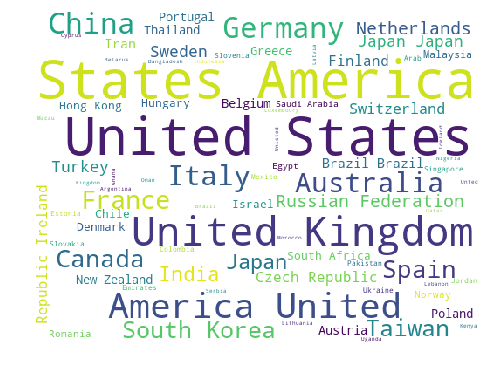

In [103]:
x2016 = timedata.country[timedata.year == 2016]
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(x2016))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

plt.show()

In [143]:
grad=np.array(Image.open("grad.png"))

def transform_format(val):
    if val == 0:
        return 255
    else:
        return val
    
transformed_grad = np.ndarray((grad.shape[0],grad.shape[1]), np.int32)

for i in range(len(grad)):
    transformed_grad[i] = list(map(transform_format, grad[i]))

In [139]:

def random_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = int(360.0 * 21.0 / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)

    return "hsl({}, {}%, {}%)".format(h, s, l)

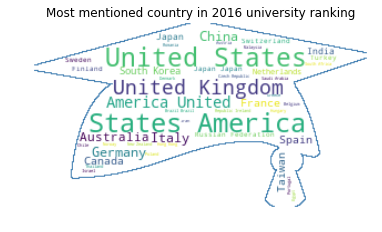

In [157]:
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_grad
               , contour_width=0.1,  contour_color="steelblue")
x2016 = timedata.country[timedata.year == 2016]

wc.generate(" ".join(x2016))
wc.to_file("grad.png")

plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Most mentioned country in 2016 university ranking")
plt.show()